# **Setup**

In [1]:
!python3 --version

Python 3.11.4


In [10]:
from psutil import *
print('CPU Core Count: ',cpu_count())
print(f'System RAM: {virtual_memory()[0]/1024/1024/1024:.2f} GB')

CPU Core Count:  8
System RAM: 8.00 GB


In [88]:
import os
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

In [64]:
sns.color_palette("hls",24)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5012, 0.33999999999999997),
 (0.86, 0.6312, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.6988, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.43879999999999986, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.86, 0.6312),
 (0.33999999999999997, 0.86, 0.7612000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6988, 0.86),
 (0.33999999999999997, 0.5688000000000001, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.5011999999999995, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.7612000000000001, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999),
 (0.86, 0.33999999999999997, 0.6987999999999996),
 (0.86, 0.33999999999999997, 0.5688000000000001),
 (0.86, 0.33999999999999997, 0.43879999999999986)]

# **Data Import**

In [14]:
df = pd.read_csv('arbuthnot.csv')
print('Dataframe shape: ',df.shape)
df.head()

Dataframe shape:  (82, 3)


,year,boys,girls
0,1629,5218,4683
1,1630,4858,4457
2,1631,4422,4102
3,1632,4994,4590
4,1633,5158,4839


# **Data Processing**

## **Births In London**

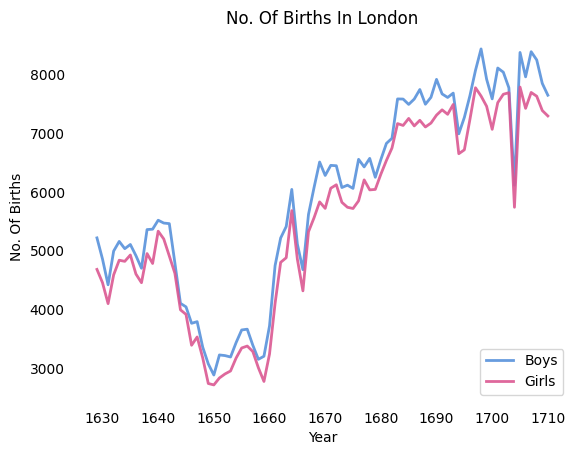

In [70]:
fig, ax = plt.subplots()
ax.plot(df['year'],df['boys'],linewidth=2, color=sns.color_palette("hls",24)[14], alpha=.9)
ax.plot(df['year'],df['girls'],linewidth=2, color=sns.color_palette("hls",24)[22], alpha=.9)
plt.title('No. Of Births In London')
plt.xlabel('Year')
plt.ylabel('No. Of Births')
plt.legend(labels=['Boys', 'Girls'], loc='lower right')

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

## **Plot Excess Male Births**

In [15]:
df['boys_per_100_girls'] = df['boys']/df['girls']*100

In [24]:
# Compute exponential moving average
alpha = 0.03  # Smoothing factor (0 < alpha < 1)
moving_avg = [df['boys_per_100_girls'][4]]

for i in range(1, len(df['boys_per_100_girls'])):
    moving_avg.append(alpha * df['boys_per_100_girls'][i] + (1 - alpha) * moving_avg[-1])

print(moving_avg)

[106.59227113039884, 106.6644154936823, 106.6985152082965, 106.76161203962931, 106.75653181235239, 106.68765328536772, 106.59538407641708, 106.6007798831148, 106.56833871682105, 106.61785559893515, 106.78428648615103, 106.6854090543572, 106.6406160134957, 106.77744641292789, 106.68848299454913, 106.57039042615374, 106.47126289300678, 106.60672736262306, 106.62911377703848, 106.60188450079114, 106.76762985943091, 106.74975893572733, 106.96029433666959, 107.07335620808256, 107.10143940152916, 107.13564378160974, 107.19568614328836, 107.23351159683713, 107.11410430305182, 107.04405986629348, 107.29444249317415, 107.51632372407649, 107.75905899409268, 107.784250996912, 107.87647638648835, 107.83028947035575, 107.75347053511292, 107.77022969759622, 107.70284997690509, 107.74856303874901, 107.86453641006725, 107.92183340047198, 107.87622591536922, 107.79827247124148, 107.69366129469955, 107.6589128012751, 107.60808542073518, 107.74156681911876, 107.61571994351505, 107.65328514282271, 107.525

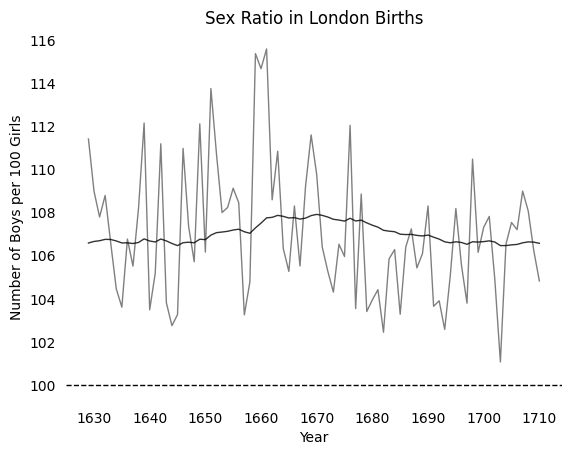

In [33]:
fig, ax = plt.subplots()
ax.plot(df['year'], df['boys_per_100_girls'], linewidth=1, color='k', alpha=.5)
ax.plot(df['year'], moving_avg, linewidth=1, color='k', alpha=.8)
plt.axhline(y = 100, color = 'k',  linewidth=1, linestyle = '--')
plt.title('Sex Ratio in London Births')
plt.xlabel('Year')
plt.ylabel('Number of Boys per 100 Girls')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')

## **Coin Flipping**

In [60]:
np.random.randint(low=2,size=10)

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [61]:
def repeated_coint_toss(num_flips):
    return np.random.randint(2, size=num_flips)
  
num_flips = 82
num_simulations = 5000000

results = []
for simulation in range(num_simulations):
    outcome = repeated_coint_toss(num_flips)
    results.append(np.sum(outcome))

In [74]:
print('Length Of List: ',len(results))
# print('Mean Value: ',math.mean)

Length Of List:  5000000


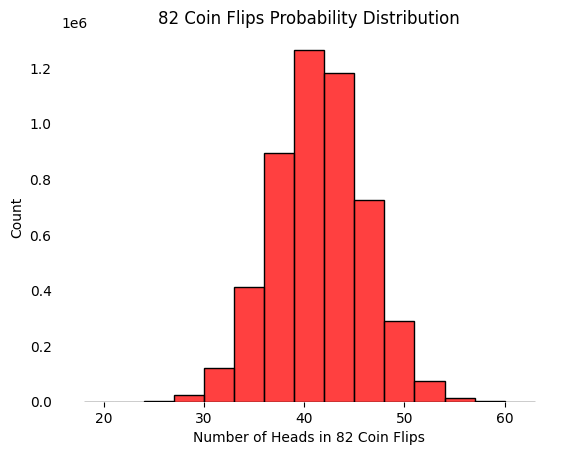

In [86]:
fig, ax = plt.subplots()
# sns.distplot(results, color='red',hist_kws={'edgecolor':'white'},bins=15,kde_kws={'bw_adjust':5})
# sns.displot(results, color='red',bins=15,kde_kws={'bw_adjust':5})
sns.histplot(results, color='red',bins=15,kde_kws={'bw_adjust':5})
plt.title('82 Coin Flips Probability Distribution')
plt.xlabel('Number of Heads in 82 Coin Flips')

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') 

In [87]:
# Estimate mean and standard deviation of coin flip distribution
cf_mean = np.mean(results)
cf_std = np.std(results)
print('Mean: {} \n Std: {}'.format(cf_mean, cf_std))

Mean: 41.0000832 
 Std: 4.526173482432786


In [89]:
dist = sps.norm(loc=cf_mean, scale=cf_std)
x = np.linspace(dist.ppf(.001), dist.ppf(.999))
y = dist.pdf(x)

In [90]:
# Get percentiles of interests
ppfs = {}
for ppf in [0.025, 0.5, 0.975]:
    p = dist.ppf(ppf)
    ppfs[ppf*100] = p

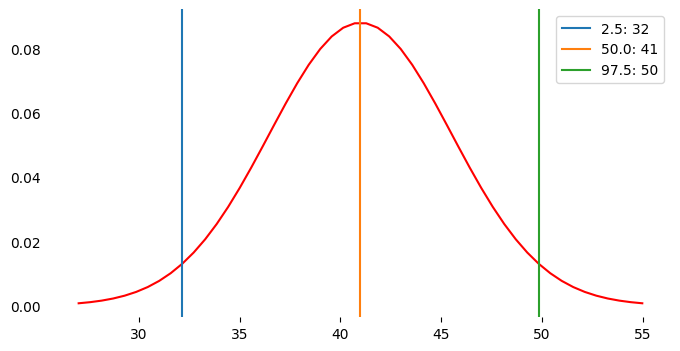

In [93]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y, color='red')

for i, ppf in enumerate(ppfs.keys()):
    ax.axvline(ppfs[ppf], color=f'C{i}', label=f'{ppf:.1f}: {ppfs[ppf]:.0f}')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') 
plt.savefig('coin-flips-percentiles.png')

# **Z Test**

In [101]:
# Define the observed excess of male births and the total number of years
observed_excess = 82  # Replace with your actual observed excess
total_years = 82  # Replace with the total number of years

# Define the expected probability of more boys than girls (under null hypothesis)
expected_probability = 0.5  # Assuming a 50:50 chance

# Calculate the standard error of the proportion
standard_error = np.sqrt((expected_probability * (1 - expected_probability)) / total_years)

# Calculate the z-score, which measures how many standard errors the observed excess is from the expected value
z_score = (observed_excess - (total_years * expected_probability)) / standard_error

# Calculate the two-tailed p-value for the z-score
p_value = 2 * (1 - sps.norm.cdf(np.abs(z_score)))

# Print the results
print(f"Observed Excess: {observed_excess}")
print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.20f}")

# Interpret the results
if p_value < 0.05:  # You can adjust the significance level as needed
    print("The observed excess of male births is statistically significant.")
else:
    print("The observed excess of male births is not statistically significant.")

Observed Excess: 82
Z-Score: 742.54
P-Value: 0.00000000000000000000
The observed excess of male births is statistically significant.
